In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
#-------------------- Import Libraries --------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df = pd.read_csv("Mall_Customers.csv")
print("Dataset loaded successfully!")
display(df.head())


Dataset loaded successfully!


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# -------------------- Data Preprocessing --------------------
# Drop CustomerID if present
if "CustomerID" in df.columns:
    df.drop("CustomerID", axis=1, inplace=True)
    # Encode Gender
if "Gender" in df.columns:
    le = LabelEncoder()
    df["Gender"] = le.fit_transform(df["Gender"])
    print(" Encoded 'Gender' column successfully!")


 Encoded 'Gender' column successfully!


In [ ]:
# Keep only numeric columns
df_numeric = df.select_dtypes(include=[np.number])
print("\nNumeric columns used for clustering:", df_numeric.columns.tolist())


Numeric columns used for clustering: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [ ]:
# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

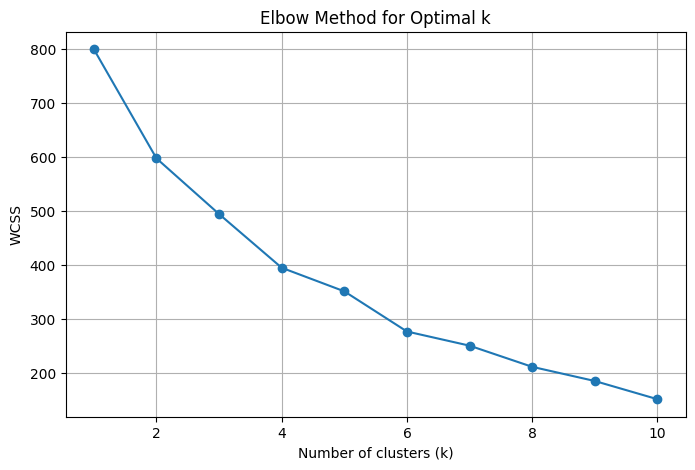

In [ ]:
# -------------------- Elbow Method --------------------
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [ ]:
# -------------------- Choose k --------------------
num_clusters = 5  # You can change this based on the elbow plot
print(f"\n Applying K-Means with k={num_clusters}...")

kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)
df["Cluster"] = cluster_labels

# -------------------- Silhouette Score --------------------
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(scaled_data, cluster_labels)
print(f"\nSilhouette Score for k={num_clusters}: {sil_score:.3f}")

print(f" Clustering complete! {num_clusters} clusters formed.")
display(df.head())


 Applying K-Means with k=5...

Silhouette Score for k=5: 0.272
 Clustering complete! 5 clusters formed.


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,4
4,0,31,17,40,4



 Visualizing clusters (2D)...


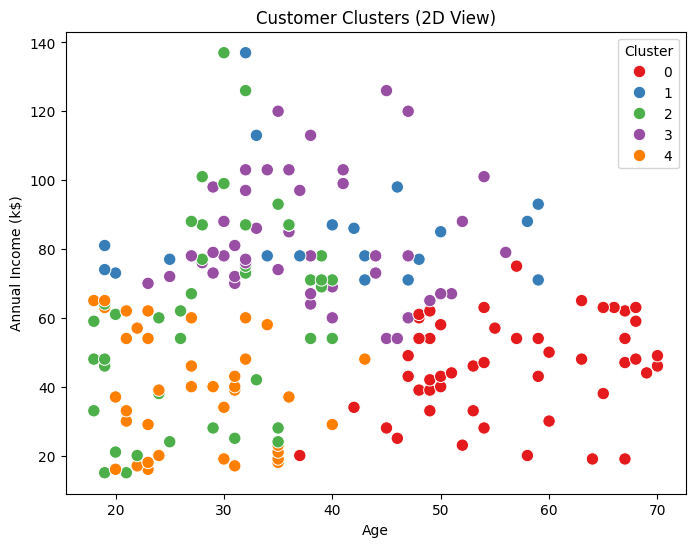

In [ ]:
# -------------------- Visualization --------------------
print("\n Visualizing clusters (2D)...")
if df_numeric.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=df_numeric.iloc[:, 1],
        y=df_numeric.iloc[:, 2],
        hue=df["Cluster"],
        palette="Set1",
        s=80
    )
    plt.xlabel(df_numeric.columns[1])
    plt.ylabel(df_numeric.columns[2])
    plt.title("Customer Clusters (2D View)")
    plt.legend(title="Cluster")
    plt.show()
else:
    print(" Not enough numeric features for 2D visualization.")


In [ ]:
# -------------------- Cluster Summary --------------------
print("\n Cluster Summary (mean values per cluster):")
summary = df.groupby("Cluster").mean(numeric_only=True)
display(summary)


 Cluster Summary (mean values per cluster):


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.509804,56.470588,46.098039,39.313725
1,1.000000,39.500000,85.150000,14.050000
2,1.000000,28.690476,60.904762,70.238095
3,0.000000,37.897959,82.122449,54.448980
4,0.000000,27.315789,38.842105,56.210526


In [ ]:
# -------------------- Save Result --------------------
output_file = "clustered_customers.csv"
df.to_csv(output_file, index=False)


from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>